# Starter

In [1]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# In case of OSError: [Errno 107] Transport endpoint is not connected, restart Kernel

FOLDERNAME = 'SBIR'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))


# this changes the working directory to the folder, and allows us to perform version control operations
%cd drive/My\ Drive/$FOLDERNAME
!git config --global user.email "arjun2000ashok@gmail.com"
!git config --global user.name "Arjun Ashok"



import matplotlib.pyplot as plt
import torch
import os
import glob
torch.manual_seed(0)

import numpy as np
np.random.seed(0)

from PIL import Image
from io import BytesIO
%matplotlib inline

%load_ext autoreload
%autoreload 2
!pip install wandb -qq
import wandb
!wandb login 28f856e56e11e0b499f7b141ce1d61b0a6671e97

!git log -3

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/SBIR
     |████████████████████████████████| 1.4MB 2.7MB/s 
     |████████████████████████████████| 102kB 6.6MB/s 
     |████████████████████████████████| 163kB 15.3MB/s 
     |████████████████████████████████| 102kB 7.7MB/s 
     |████████████████████████████████| 122kB 16.7MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
wandb: Appending key for api.wandb.ai to your netr

In [2]:
# ONLY IN COLAB


!mkdir ../../../Sketchy
!unzip data/Sketchy.zip -d ../../../Sketchy
!cp data/test_embeddings.npy ../../../Sketchy/test_embeddings.npy
!cp data/train_embeddings.npy ../../../Sketchy/train_embeddings.npy

Streaming output truncated to the last 5000 lines.
  inflating: ../../../Sketchy/sketches/pizza/n07873807_11348-5.png  
  inflating: ../../../Sketchy/sketches/pizza/n07873807_11457-1.png  
  inflating: ../../../Sketchy/sketches/pizza/n07873807_11457-2.png  
  inflating: ../../../Sketchy/sketches/pizza/n07873807_11457-3.png  
  inflating: ../../../Sketchy/sketches/pizza/n07873807_11457-4.png  
  inflating: ../../../Sketchy/sketches/pizza/n07873807_11457-5.png  
  inflating: ../../../Sketchy/sketches/pizza/n07873807_11641-1.png  
  inflating: ../../../Sketchy/sketches/pizza/n07873807_11641-2.png  
  inflating: ../../../Sketchy/sketches/pizza/n07873807_11641-3.png  
  inflating: ../../../Sketchy/sketches/pizza/n07873807_11641-4.png  
  inflating: ../../../Sketchy/sketches/pizza/n07873807_11641-5.png  
  inflating: ../../../Sketchy/sketches/pizza/n07873807_11663-1.png  
  inflating: ../../../Sketchy/sketches/pizza/n07873807_11663-2.png  
  inflating: ../../../Sketchy/sketches/pizza/n078738

# Git commit and push

In [ ]:
# !git reset --soft HEAD~1 # UNDO PREVIOUS COMMIT AND PUT THOSE FILES IN STAGING AREA
# !git status # - VIEW STAGED, UNTRACKED FILES
# !git reset HEAD -- . # - TO UNSTAGE FILES
!git log # LOG

In [4]:
!git add .
!git commit -m 'CA Full Basic Triplet loss with Maxpool'
!git push -u origin master

[master 66768ec] CA Basic Triplet Loss with Conv
 4 files changed, 17 insertions(+), 19 deletions(-)
 create mode 100644 sbir.ipynb
Counting objects: 7, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 538.33 KiB | 11.21 MiB/s, done.
Total 7 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/aiarjun/Sketch-Based-Image-Retrieval.git
   f61a6b4..66768ec  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.


In [ ]:
# !git stash
!git pull

Updating 085a42c..866c4bb
Fast-forward
 model/loss.py |  6 +++---
 train.py      | 10 +++++-----
 utils.py      | 11 +++++------
 3 files changed, 13 insertions(+), 14 deletions(-)


# Reading and writing embedding files

## GloVe

https://medium.com/@martinpella/how-to-use-pre-trained-word-embeddings-in-pytorch-71ca59249f76

In [ ]:
%pip install bcolz
import bcolz
import pickle

glove_path = '../../../glove'
words = []
idx = 0
word2idx = {}
vectors = bcolz.carray(np.zeros(1), rootdir=f'{glove_path}/6B.300.dat', mode='w')

with open(f'{glove_path}/glove.6B.300d.txt', 'rb') as f:
    for l in f:
        line = l.decode().split()
        word = line[0]
        words.append(word)
        word2idx[word] = idx
        idx += 1
        vect = np.array(line[1:]).astype(np.float)
        vectors.append(vect)
    
vectors = bcolz.carray(vectors[1:].reshape((400001, 300)), rootdir=f'{glove_path}/6B.300.dat', mode='w')
vectors.flush()
pickle.dump(words, open(f'{glove_path}/6B.300_words.pkl', 'wb'))
pickle.dump(word2idx, open(f'{glove_path}/6B.300_idx.pkl', 'wb'))

In [ ]:
vectors = bcolz.open(f'{glove_path}/6B.300.dat')[:]
words = pickle.load(open(f'{glove_path}/6B.300_words.pkl', 'rb'))
word2idx = pickle.load(open(f'{glove_path}/6B.300_idx.pkl', 'rb'))

glove = {w: vectors[word2idx[w]] for w in words}

## Word2Vec

In [ ]:
import gensim.downloader as api

model = api.load("word2vec-google-news-300") 

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
def get_embeddings(labels):
    embeddings = []
    for label in labels:
        embeddings.append(np.array(glove[label]))
    embeddings = np.array(embeddings)  
    return embeddings

data_dir = '../../../Sketchy'

train_labels = open(os.path.join(data_dir, 'train_labels.txt')).read().splitlines() 
test_labels = open(os.path.join(data_dir, 'test_labels.txt')).read().splitlines() 

train_embeddings = get_embeddings(train_labels)
test_embeddings = get_embeddings(test_labels)

np.save(os.path.join(data_dir, 'train_embeddings.npy'), train_embeddings)
np.save(os.path.join(data_dir, 'test_embeddings.npy'), test_embeddings)

In [ ]:
train_embeddings = np.load(os.path.join(data_dir, 'train_embeddings.npy'))
test_embeddings = np.load(os.path.join(data_dir, 'test_embeddings.npy'))
display(train_embeddings.shape, test_embeddings.shape)

(5, 300)

(2, 300)

# Testing the dataloader module

In [ ]:
from model.dataloader import Dataloaders
dataloaders = Dataloaders(data_dir = '../../../Sketchy/')
train_dict = {v:k for k,v in dataloaders.train_dict.items()}; test_dict= {v:k for k,v in dataloaders.test_dict.items()};

## Train - triplets

In [ ]:
train_dataloader = dataloaders.get_train_dataloader(batch_size = 1, shuffle = True)

crocodilian
candle


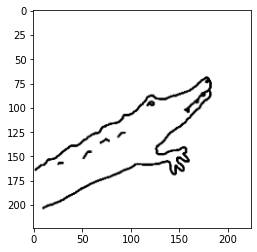

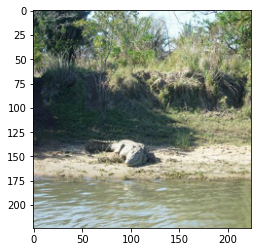

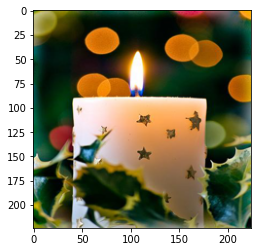

In [ ]:
iterator = iter(train_dataloader)
batch = next(iterator)

anchors, positives, negatives, embeds, label_idxs, neg_label_idxs = batch
idx = 0


print(train_dict[label_idxs[idx].cpu().item()])
plt.figure()
plt.imshow(np.transpose(anchors[idx].cpu().numpy(),(1,2,0)))

plt.figure()
plt.imshow(np.transpose(positives[idx].cpu().numpy(),(1,2,0)))

print(train_dict[neg_label_idxs[idx].cpu().item()])
plt.figure()
plt.imshow(np.transpose(negatives[idx].cpu().numpy(),(1,2,0)))

## Test - sketches and images

In [ ]:
test_dataloader_sketches = dataloaders.get_test_dataloader(batch_size = 4, section = 'sketches', shuffle = True)

sword


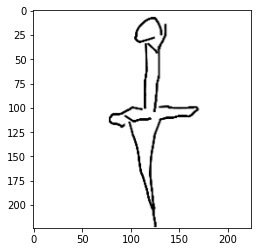

In [ ]:
batch = next(iter(test_dataloader_sketches))
images, label_idxs = batch
idx = 1

plt.figure()
plt.imshow(np.transpose(images[idx].cpu().numpy(),(1,2,0)))
print(test_dict[label_idxs[idx].cpu().item()])

In [ ]:
test_dataloader_images = dataloaders.get_test_dataloader(batch_size = 4, section = 'photos', shuffle = True)

sword


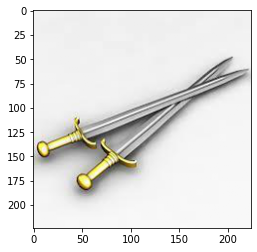

In [ ]:
batch = next(iter(test_dataloader_images))
images, label_idxs = batch
idx = 3

plt.figure()
plt.imshow(np.transpose(images[idx].cpu().numpy(),(1,2,0)))

print(test_dict[label_idxs[idx].cpu().item()])

# Full Train Images and Sketches

In [ ]:
full_train_dataloader_sketches = dataloaders.get_full_train_dataloader(batch_size = 4, section = 'sketches', shuffle = False)

airplane


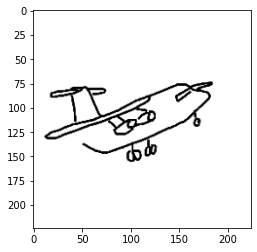

In [ ]:
batch = next(iter(full_train_dataloader_sketches))
images, label_idxs = batch
idx = 3

plt.figure()
plt.imshow(np.transpose(images[idx].cpu().numpy(),(1,2,0)))
print(train_dict[label_idxs[idx].cpu().item()])

In [ ]:
full_train_dataloader_photos = dataloaders.get_full_train_dataloader(batch_size = 4, section = 'photos', shuffle = False)

airplane


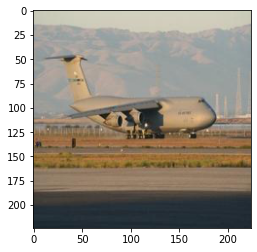

In [ ]:
batch = next(iter(full_train_dataloader_photos))
images, label_idxs = batch
idx = 3

plt.figure()
plt.imshow(np.transpose(images[idx].cpu().numpy(),(1,2,0)))
print(train_dict[label_idxs[idx].cpu().item()])

# Testing the model and loss

In [ ]:
from model.net import MainModel
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = MainModel(use_attention=True).to(device)
model.train()
x = torch.randn(8, 3, 224, 224)
x = torch.autograd.Variable(x).to(device)
x, attn = model(x)
display(x.shape)
display(attn.shape)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


torch.Size([8, 300])

torch.Size([8, 1, 7, 7])

In [ ]:
from model.loss import DetangledJointDomainLoss
batch_size = 8; embedding_size = 300
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

embedding_anchor = torch.randn(batch_size, embedding_size).to(device)
embedding_positive = torch.randn(batch_size, embedding_size).to(device)
embedding_negative = torch.randn(batch_size, embedding_size).to(device)
embedding_true = torch.randn(batch_size, embedding_size).to(device)
epoch = 0

In [ ]:
from model.loss import DetangledJointDomainLoss

loss_model = DetangledJointDomainLoss(embedding_size, device=device).to(device)
loss_model(x, embedding_positive,embedding_negative, embedding_true, epoch)

(tensor(1.0130, device='cuda:0', grad_fn=<AddBackward0>),
 tensor(2.0700, device='cuda:0', grad_fn=<AddBackward0>),
 tensor(0.5070, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(1.4750, device='cuda:0', grad_fn=<MeanBackward0>))

# Training

In [ ]:
start_epoch = 0
num_epochs = 50
batch_size = 16
test_batch_size = 4
print_every = 100
learning_rate = 3e-4

lr_scheduler_step_size = 50
resume_checkpoint_file_name = ''
local = False


wandb.init(project="ZS-SBIR")
config = wandb.config      
config.batch_size = batch_size          
config.test_batch_size = test_batch_size
config.epochs = num_epochs            
config.lr = learning_rate  
config.lr_scheduler_step_size = lr_scheduler_step_size
config.print_every = print_every
config.start_epoch = start_epoch

config.pretrained = True
config.embedding_size = 300
config.use_attention = False
config.grl_lambda = 0.8
config.w_dom = 0.50
config.w_triplet = 0.50
config.w_sem = 0.50


from train import Trainer
trainer = Trainer('../../../Sketchy/')
trainer.train_and_evaluate(config, resume_checkpoint_file_name, local)

# Testing get_sketch_images_grids

In [ ]:
from model.dataloader import Dataloaders
dataloaders = Dataloaders(data_dir = '../../../Sketchy/')
test_dataloader_sketches = dataloaders.get_test_dataloader(batch_size = 256, section = 'sketches', shuffle = True)
test_dataloader_images = dataloaders.get_test_dataloader(batch_size = 4, section = 'photos', shuffle = True)

sketches = []; images = []
for _, batch in enumerate(test_dataloader_sketches):
  cur_sketches, _ = batch; sketches.append(cur_sketches)
sketches = torch.cat(sketches, dim = 0)

for _, batch in enumerate(test_dataloader_images):
  cur_images, _ = batch; images.append(cur_images)
images = torch.cat(images, dim = 0)

In [ ]:
from utils import get_sketch_images_grids

similarity = np.random.randn(sketches.shape[0], images.shape[0])
sketch_grids, images_grids = get_sketch_images_grids(sketches, images, similarity, k = 5, num_display =2)

[[644 463 725 182 752]
 [637 744 387 666 757]]
[[3.62792249 3.25873909 2.80394133 2.317406   2.22814212]
 [3.05078842 2.92184352 2.62868958 2.54778805 2.53080918]]


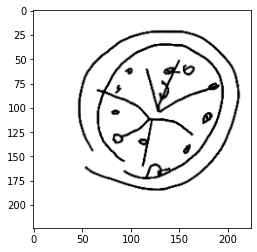

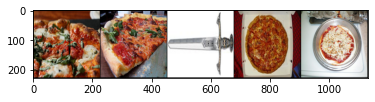

In [ ]:
plt.figure()
plt.imshow(sketch_grids[0])
plt.figure()
plt.imshow(images_grids[0])

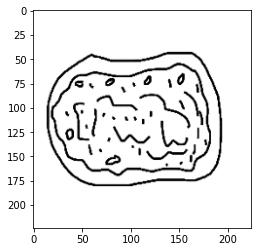

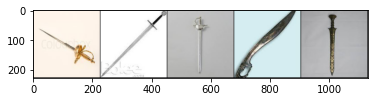

In [ ]:
plt.figure()
plt.imshow(sketch_grids[1])
plt.figure()
plt.imshow(images_grids[1])

# Pretrained model evaluation with training set/test set

In [ ]:
from model.dataloader import Dataloaders
from utils import *
from model.net import MainModel
from model.loss import DetangledJointDomainLoss

dataloaders = Dataloaders(data_dir = '../../../Sketchy/')

In [ ]:
run_id = '2b0adtxq'
checkpoint_file = 'state_epoch_7__.pth.tar'


wandb.init(id = '2b0adtxq', project="ZS-SBIR", resume=True)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

image_model = MainModel(pretrained = True, output_embedding_size = 300, use_attention = True)
sketch_model = MainModel(pretrained = True, output_embedding_size = 300, use_attention = True)
loss_model = DetangledJointDomainLoss(input_size = 300, device = device)

image_model = image_model.to(device); sketch_model = sketch_model.to(device); loss_model = loss_model.to(device);
checkpoint = wandb.restore(checkpoint_file)
load_checkpoint(os.path.join(wandb.run.dir, checkpoint_file), image_model, sketch_model, loss_model)

In [ ]:
from evaluate import evaluate

sketches, image_grids, test_mAP = evaluate({'test_batch_size':16}, dataloaders.get_full_train_dataloader, image_model, sketch_model, dataloaders.train_dict)

Class: airplane, mAP: 0.197326
Class: bear, mAP: 0.198355
Class: candle, mAP: 0.216970
Class: crocodilian, mAP: 0.199085
Class: hammer, mAP: 0.227762
[[1739 2464 1533 2726 1308]
 [1739 2464 1533 2726 1308]]
[[2.01527535e-07 2.01527512e-07 2.01527512e-07 2.01527511e-07
  2.01527508e-07]
 [3.32305078e-07 3.32305017e-07 3.32305017e-07 3.32305015e-07
  3.32305005e-07]]


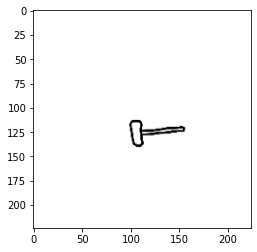

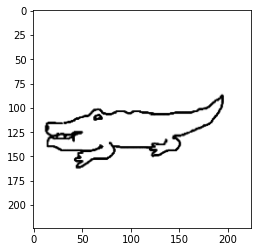

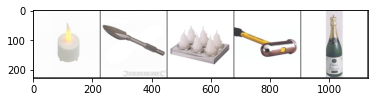

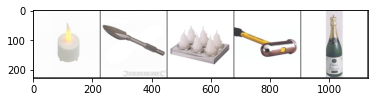

In [ ]:
_ = [plt.figure() and plt.imshow(sketch) for sketch in sketches]
_ = [plt.figure() and plt.imshow(image) for image in image_grids]

# Many-shot retrieval

In [ ]:
start_epoch = 0
num_epochs = 20
batch_size = 16
test_batch_size = 8
print_every = 30
learning_rate = 3e-4

lr_scheduler_step_size = 50
resume_checkpoint_file_name = ''
local = False


wandb.init(project="SBIR")
config = wandb.config      
config.batch_size = batch_size          
config.test_batch_size = test_batch_size
config.epochs = num_epochs            
config.lr = learning_rate  
config.lr_scheduler_step_size = lr_scheduler_step_size
config.print_every = print_every
config.start_epoch = start_epoch

from train_2 import Trainer
trainer = Trainer('../../../Sketchy/')
trainer.train_and_evaluate(config, resume_checkpoint_file_name, local)


#  REMEMBER: COMMIT AFTER A LONG RUN

Failed to connect to W&B servers after 10 seconds.                    Letting user process proceed while attempting to reconnect.
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


A total of 724 parameters are present in the models
Training...
2020-08-18 19:52:28+05:30 Epoch: 0 [0 / 200] ; eta: 0:08:20
Triplet loss: 2.388379(2.388379);
2020-08-18 19:53:09+05:30 Epoch: 0 [30 / 200] ; eta: 0:03:56
Triplet loss: 0.429389(1.752385);
2020-08-18 19:53:50+05:30 Epoch: 0 [60 / 200] ; eta: 0:03:12
Triplet loss: 0.669294(1.369511);
2020-08-18 19:54:31+05:30 Epoch: 0 [90 / 200] ; eta: 0:02:30
Triplet loss: 0.270875(1.206369);
2020-08-18 19:55:12+05:30 Epoch: 0 [120 / 200] ; eta: 0:01:49
Triplet loss: 0.866550(1.105116);
2020-08-18 19:55:54+05:30 Epoch: 0 [150 / 200] ; eta: 0:01:08
Triplet loss: 0.770985(1.056652);
2020-08-18 19:56:35+05:30 Epoch: 0 [180 / 200] ; eta: 0:00:27
Triplet loss: 1.062743(1.026892);
Epoch 0 complete, time taken: 0:04:35
Class: airplane, mAP: 0.610239
Class: bear, mAP: 0.724448
Class: candle, mAP: 0.446183
Class: crocodilian, mAP: 0.652844
Class: hammer, mAP: 0.578133
Saved epoch to cloud!




2020-08-18 20:00:13+05:30 Epoch: 1 [0 / 200] ; eta: 0:0

In [ ]:
from model.net import BasicModel, EmbeddingLossModel
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

basic = BasicModel().to(device).train()
embedding = EmbeddingLossModel().to(device).train()

x = torch.randn(9,3,224,224, device = device)

y = basic(x)
z = embedding(y, torch.randn(9,300, device = device))

criterion = torch.nn.TripletMarginLoss(margin = 1.0, p = 2)

criterion(y,y,y).backward(retain_graph = True)
z.backward()